# Competency Questions

## (1) Find the Similarity Between Summary of Beijing and Shanghai city using Min Hash Jecard Similarity

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data/COVID19_line_list_data.csv')

In [20]:
df.head(10)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,1/15/2020,...,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,01/11/20,...,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,1/14/2020,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,01/09/20,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,1/16/2020,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
set_01 = df.summary[df.location == 'Shanghai'].iloc[0]
print(set_01)

First confirmed imported COVID-19 pneumonia patient in Shanghai (from Wuhan): female, 56, Wuhan residence, arrived in Shanghai from Wuhan on 01/12/2020, symptom onset and visited fever clinic on 01/15/2020, laboratory confirmed on 01/20/2020


In [29]:
set_02 = df.summary[df.location == 'Beijing'].iloc[0]
print(set_02)

new confirmed imported COVID-19 pneumonia patient in Beijing: male, 37, visited Wuhan on 01/10/2020, return to Beijing on 01/11/2020, symptoms onset on 01/14/2020, hospitalized on 01/20/2020.


In [32]:
import nltk
import re

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [36]:
# nltk.download("stopwords")

In [56]:
def cleaner(string):
    clean_01 = re.sub(r"[^a-zA-Z]"," ",string)
    clean_02 = clean_01.lower()
    clean_03 = clean_02.split()
    clean_04 = [word for word in clean_03 if not word in stopwords.words("english")]
    
    # Apply Stemming to get the root of the word
    ps = PorterStemmer()
    clean_05 = [ps.stem(word) for word in clean_04]
    return clean_05
    

In [206]:
cleaned_set_01 = cleaner(set_01)
cleaned_set_02 = cleaner(set_02)

In [207]:
from datasketch import MinHash

data1 = cleaned_set_01
data2 = cleaned_set_02

m1, m2 = MinHash(), MinHash()
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
print("Estimated Jaccard for data1 and data2 is", m1.jaccard(m2))

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)

Estimated Jaccard for data1 and data2 is 0.4453125
Actual Jaccard for data1 and data2 is 0.4090909090909091


# (2) Predict the number of Deaths using Regression

In [74]:
df = pd.read_csv('data/covid_19_data.csv')

In [80]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11336,11337,03/23/2020,Zhejiang,Uzbekistan,2020-03-23 23:19:21,46.0,0.0,0.0
11337,11338,03/23/2020,Zhejiang,Venezuela,2020-03-23 23:19:21,77.0,0.0,15.0
11338,11339,03/23/2020,Zhejiang,Vietnam,2020-03-23 23:19:21,123.0,0.0,17.0
11339,11340,03/23/2020,Zhejiang,Zambia,2020-03-23 23:19:21,3.0,0.0,0.0


In [76]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3595
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [81]:
df.fillna(method='ffill',inplace=True)

In [83]:
import seaborn as sns

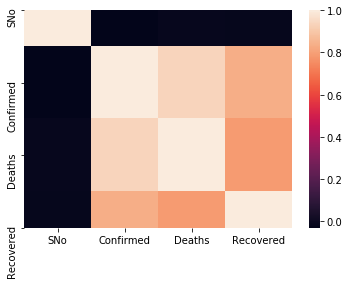

In [88]:
sns.heatmap(df.corr())

In [90]:
df.drop(['SNo','ObservationDate','Last Update'],axis=1, inplace=True)

In [95]:
df

,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1.0,0.0,0.0
1,Beijing,Mainland China,14.0,0.0,0.0
2,Chongqing,Mainland China,6.0,0.0,0.0
3,Fujian,Mainland China,1.0,0.0,0.0
4,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
11336,Zhejiang,Uzbekistan,46.0,0.0,0.0
11337,Zhejiang,Venezuela,77.0,0.0,15.0
11338,Zhejiang,Vietnam,123.0,0.0,17.0
11339,Zhejiang,Zambia,3.0,0.0,0.0


In [96]:
df.dtypes

Province/State     object
Country/Region     object
Confirmed         float64
Deaths            float64
Recovered         float64
dtype: object

In [97]:
df['Province/State'] = df['Province/State'].astype('category')
df['Country/Region'] = df['Country/Region'].astype('category')

In [99]:
cat_Data = pd.get_dummies(df.select_dtypes(include='category'))

In [105]:
cat_Data.head(10)

,"Province/State_ Montreal, QC","Province/State_ Norfolk County, MA",Province/State_Alabama,"Province/State_Alameda County, CA",Province/State_Alaska,Province/State_Alberta,Province/State_American Samoa,Province/State_Anhui,Province/State_Arizona,Province/State_Arkansas,...,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Vatican City,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_Zambia,Country/Region_Zimbabwe,Country/Region_occupied Palestinian territory
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
y = df.pop('Deaths')

In [137]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [114]:
sd = MinMaxScaler(feature_range=(0,1))

In [117]:
num_data = pd.DataFrame(sd.fit_transform(df.select_dtypes(exclude='category')), columns=['Confirmed','Deaths'])

In [118]:
num_data

,Confirmed,Deaths
0,0.000015,0.000000
1,0.000206,0.000000
2,0.000088,0.000000
3,0.000015,0.000000
4,0.000000,0.000000
...,...,...
11336,0.000678,0.000000
11337,0.001136,0.000250
11338,0.001814,0.000284
11339,0.000044,0.000000


In [124]:
full_data = pd.concat([num_data,cat_Data], axis=1)

In [125]:
full_data.head(10)

,Confirmed,Deaths,"Province/State_ Montreal, QC","Province/State_ Norfolk County, MA",Province/State_Alabama,"Province/State_Alameda County, CA",Province/State_Alaska,Province/State_Alberta,Province/State_American Samoa,Province/State_Anhui,...,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Vatican City,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_Zambia,Country/Region_Zimbabwe,Country/Region_occupied Palestinian territory
0,0.000015,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000206,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000088,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000015,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.000383,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.000029,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.000015,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000059,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.000015,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [126]:
x_train,x_test,y_train,y_test = train_test_split(full_data,y,test_size = 0.2, random_state = 42)

In [145]:
from sklearn.tree import DecisionTreeRegressor

In [160]:
# Decison Tree is best
DT = DecisionTreeRegressor()

In [161]:
DT.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [163]:
DT.score(x_train,y_train) # Accuracy

0.9999998441726708

In [166]:
folds = KFold(n_splits=10, random_state=42)
score = cross_val_score(DT, x_train, y_train,cv=folds, scoring="neg_mean_squared_error")
accuracy = np.sqrt(-score)
print(accuracy.mean()) # will be on test data 

25.225843591802047


In [164]:
y_pred = DT.predict(x_test)
error = np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(error)

22.389359079846063


In [196]:
temp = x_test.iloc[5]
temp2 = pd.DataFrame(temp).T

In [197]:
pred = DT.predict(temp2)

In [198]:
temp2 # input

,Confirmed,Deaths,"Province/State_ Montreal, QC","Province/State_ Norfolk County, MA",Province/State_Alabama,"Province/State_Alameda County, CA",Province/State_Alaska,Province/State_Alberta,Province/State_American Samoa,Province/State_Anhui,...,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Vatican City,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_Zambia,Country/Region_Zimbabwe,Country/Region_occupied Palestinian territory
6310,0.000428,0.00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [317]:
print(pred[0]) # predicted answer

0.0


In [202]:
y_test.iloc[5] # real answer

0.0

# (3) Is there 50% Chances that Similarity Exits in Summary of Male and Females using Locality Sensitive Hashing   

In [212]:
df = pd.read_csv('data/COVID19_line_list_data.csv')

In [213]:
df.head(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
male_summary = df.summary[df.gender == 'male']
female_summary = df.summary[df.gender == 'female']

In [249]:
male_summary

0       First confirmed imported COVID-19 pneumonia pa...
2       First confirmed imported cases in Zhejiang: pa...
4       new confirmed imported COVID-19 pneumonia in T...
6       First confirmed imported COVID-19 pneumonia pa...
7       new confirmed imported COVID-19 pneumonia pati...
                              ...                        
1075    new COVID-19 patient confirmed in Bahrain: mal...
1076    new COVID-19 patient confirmed in Bahrain: mal...
1082    new COVID-19 patient confirmed in Algeria: mal...
1083    new COVID-19 patient confirmed in Croatia: mal...
1084    new COVID-19 patient confirmed in Switzerland:...
Name: summary, Length: 520, dtype: object

In [254]:
female_summary=female_summary.astype('category')

In [299]:
def cleaner_2(df):
    corpus = []
    for i in range(df.shape[0]):
        clean_01 = re.sub(r"[^a-zA-Z]"," ",str(df.iloc[i]))
        clean_02 = clean_01.lower()
        clean_03 = clean_02.split()
        clean_04 = [word for word in clean_03 if not word in stopwords.words("english")]

        # Apply Stemming to get the root of the word
        ps = PorterStemmer()
        clean_05 = [ps.stem(word) for word in clean_04]
        corpus.append(set(clean_05))
    return corpus

In [300]:
set1 = cleaner_2(male_summary)

In [301]:
set2 = cleaner_2(female_summary)

In [1]:
# set1

In [2]:
# set2

In [387]:
from datasketch import MinHash, MinHashLSH

m1 = MinHash(num_perm=128)
m2 = MinHash(num_perm=128)

for se in set1:
    for d in se:
        m1.update(d.encode('utf8'))

for se in set2:
    for d in se:
        m2.update(d.encode('utf8'))        
# Create LSH index
lsh = MinHashLSH(threshold=0.5, num_perm=128)
lsh.insert("m2", m2)
result = lsh.query(m1)

In [388]:
if result:
    print('yes, there are 50% chances that Similarity Exits in Summary of Male and Females using Locality Sensitive Hashing ')
else:
    print('NO, there is not 50% Similarity Exits in Summary of Male and Females using Locality Sensitive Hashing')

yes, there are 50% chances that Similarity Exits in Summary of Male and Females using Locality Sensitive Hashing 


# (4) Find Similarity between the Summary of Male and Females using Min Hash Jecard Similarity   

In [390]:
# We have already cleaned the data so we will apply Min has Matrix and Jeccard Similarity on It

In [3]:
# set1

In [5]:
# set2

In [384]:
from datasketch import MinHash

data1 = set1
data2 = set2

m1, m2 = MinHash(), MinHash()
for data in data1:
    for d in data:
        m1.update(d.encode('utf8'))
for data in data2:
    for d in data:
        m2.update(d.encode('utf8'))
print("Estimated Jaccard Similarity between data1 and data2 is", m1.jaccard(m2))

Estimated Jaccard Similarity between data1 and data2 is 0.5078125


### So our supposition is True in Question # 3

# (5) Find the list of countries who have death rate greater than 10 on 3/23/2020 date??

In [346]:
df = pd.read_csv('data/time_series_covid_19_deaths.csv')

In [348]:
df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


In [368]:
countries = set(df['Country/Region'][df['3/23/20'] > 10])

In [369]:
countries

{'Algeria',
 'Austria',
 'Belgium',
 'Brazil',
 'China',
 'Denmark',
 'Ecuador',
 'Egypt',
 'France',
 'Germany',
 'Greece',
 'Indonesia',
 'Iran',
 'Iraq',
 'Italy',
 'Japan',
 'Korea, South',
 'Netherlands',
 'Philippines',
 'Portugal',
 'San Marino',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'US',
 'United Kingdom'}